In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [8]:
data=pd.read_csv("Advertising.csv") #uploading the dataset

In [9]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [10]:
data.shape

(200, 4)

In [72]:
data.isnull().sum() #checking for null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [73]:
data.duplicated().sum() #checking for duplicated records

0

## Visualising Data

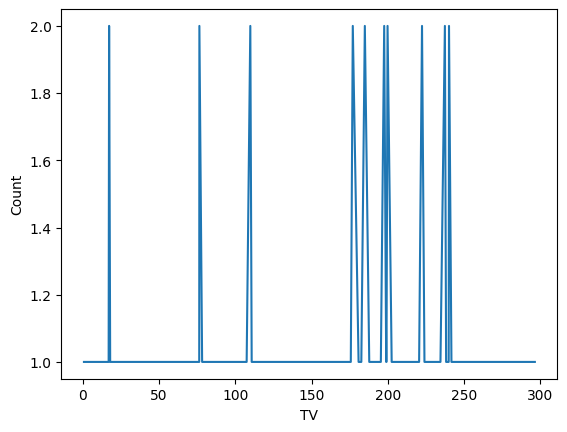

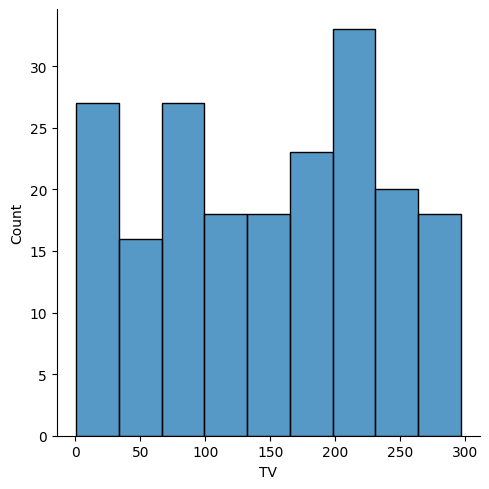

In [74]:
ax = sb.lineplot(data=data['TV'].value_counts().sort_index())
ax.set_xlabel("TV")
ax.set_ylabel("Count")
plt.show()
sb.displot(data['TV'])

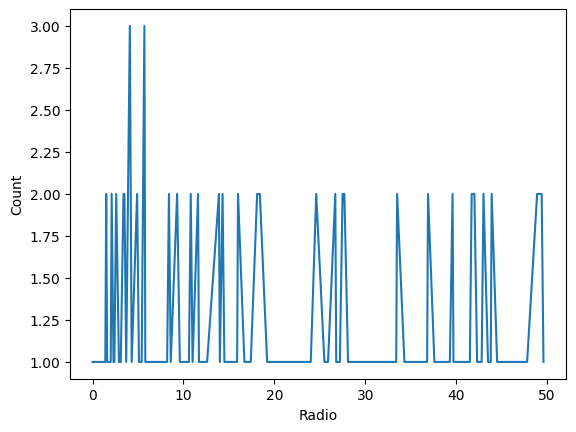

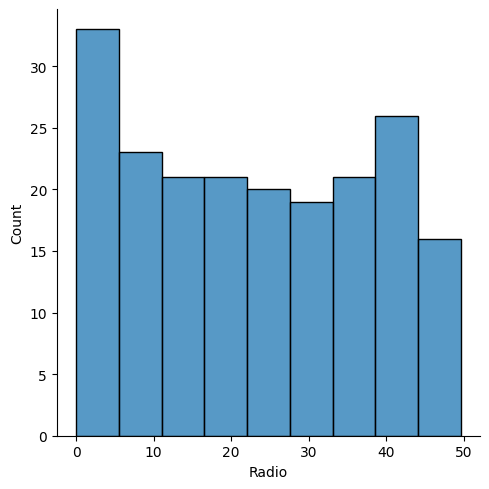

In [33]:
ax = sb.lineplot(data=data['Radio'].value_counts().sort_index())
ax.set_xlabel("Radio")
ax.set_ylabel("Count")
plt.show
sb.displot(data['Radio'])

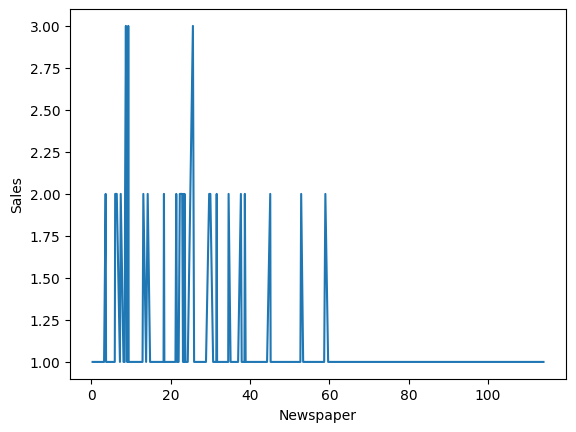

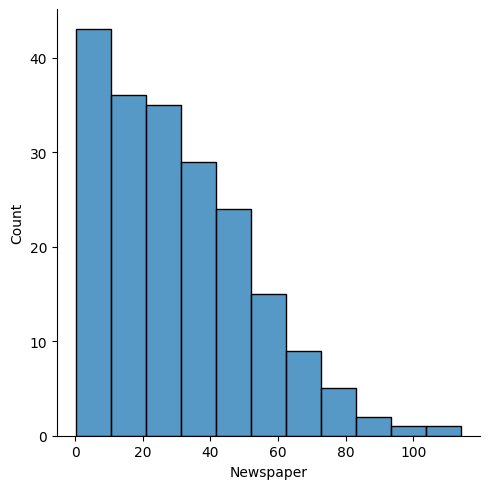

In [30]:
ax = sb.lineplot(data=data['Newspaper'].value_counts().sort_index())
ax.set_xlabel("Newspaper")
ax.set_ylabel("Sales")
plt.show()
sb.displot(data['Newspaper'])

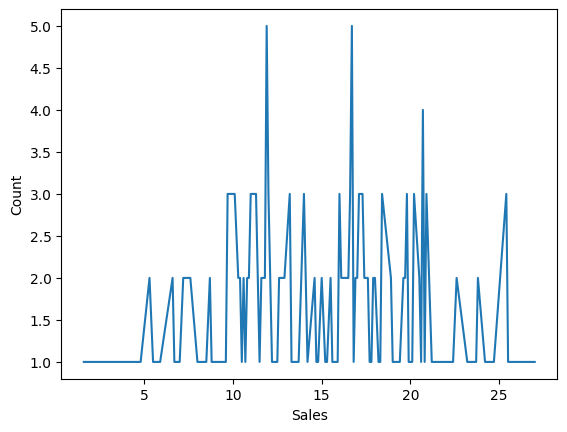

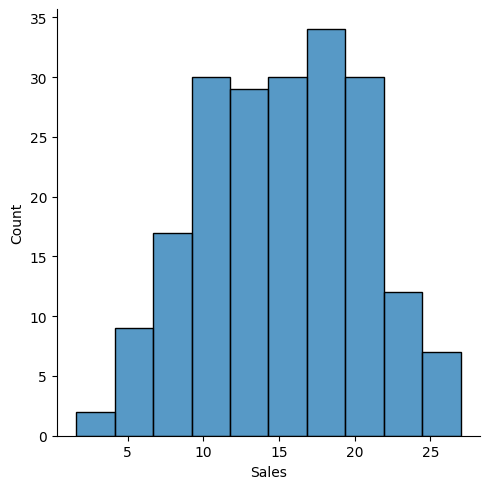

In [32]:
ax = sb.lineplot(data=data['Sales'].value_counts().sort_index())
ax.set_xlabel("Sales")
ax.set_ylabel("Count")
plt.show()
sb.displot(data['Sales'])

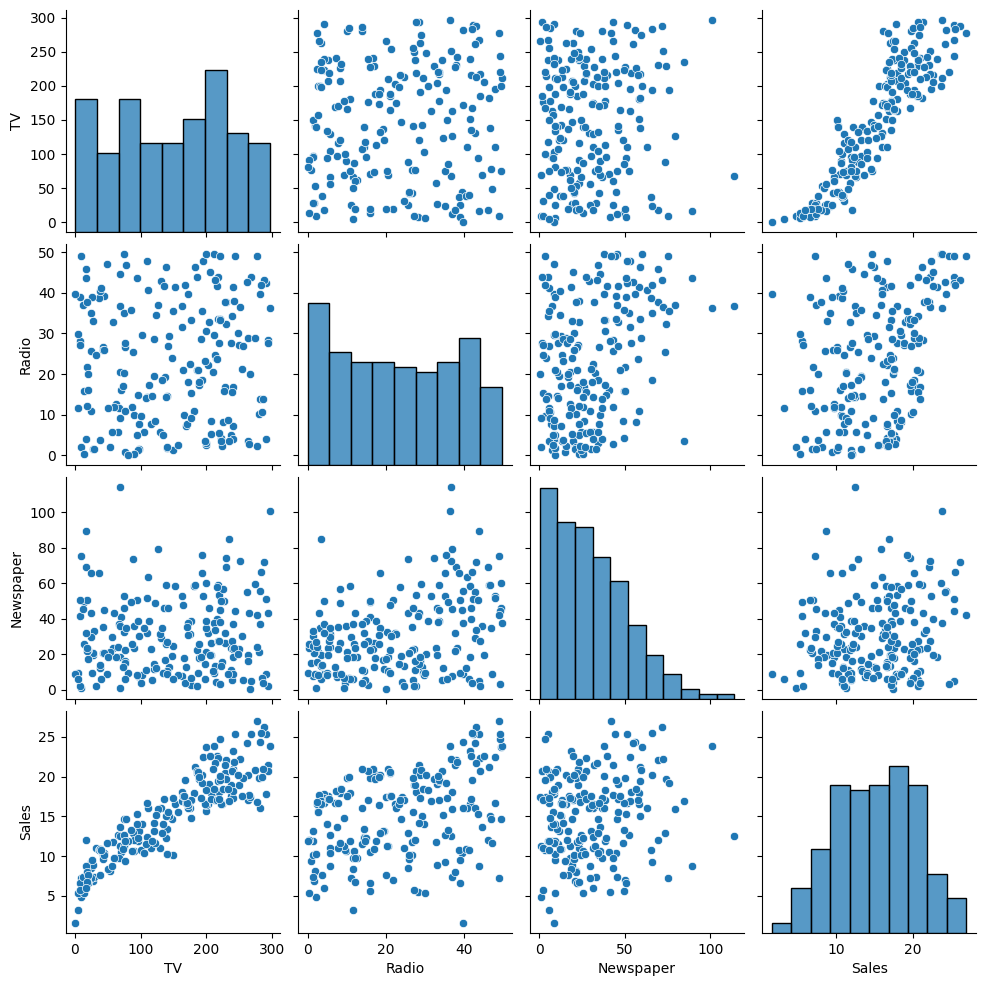

In [35]:
sb.pairplot(data)

<Axes: >

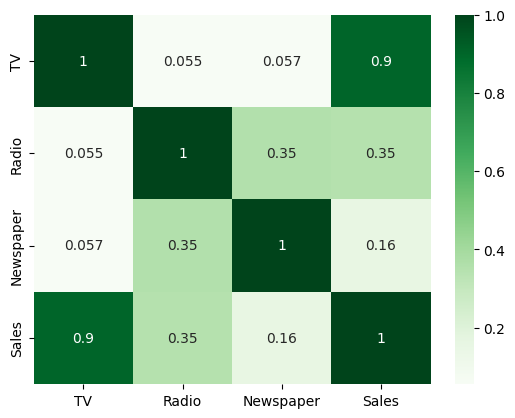

In [39]:
sb.heatmap(data.corr(),annot=True,cmap='Greens')

## Modelling

In [43]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [46]:
x,y

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
      Sales
 0     22.1
 1     10.4
 2     12.0
 3     16.5
 4     17.9
 ..     ...
 195    7.6
 196   14.0
 197   14.8
 198   25.5
 199   18.4
 
 [200 rows x 1 columns])

In [47]:
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=50)

In [48]:
xtrain,ytrain

(        TV  Radio  Newspaper
 114   78.2   46.8       34.5
 187  191.1   28.7       18.2
 76    27.5    1.6       20.7
 122  224.0    2.4       15.6
 142  220.5   33.2       37.9
 ..     ...    ...        ...
 132    8.4   27.2        2.1
 33   265.6   20.0        0.3
 109  255.4   26.9        5.5
 139  184.9   43.9        1.7
 176  248.4   30.2       20.3
 
 [140 rows x 3 columns],
      Sales
 114   14.6
 187   17.3
 76     6.9
 122   16.6
 142   20.1
 ..     ...
 132    5.7
 33    17.4
 109   19.8
 139   20.7
 176   20.2
 
 [140 rows x 1 columns])

In [49]:
xtest,ytest

(        TV  Radio  Newspaper
 112  175.7   15.4        2.4
 165  234.5    3.4       84.8
 12    23.8   35.1       65.9
 73   129.4    5.7       31.3
 144   96.2   14.8       38.9
 20   218.4   27.7       53.4
 199  232.1    8.6        8.7
 8      8.6    2.1        1.0
 39   228.0   37.7       32.0
 88    88.3   25.5       73.4
 81   239.8    4.1       36.9
 197  177.0    9.3        6.4
 69   216.8   43.9       27.2
 160  172.5   18.1       30.7
 25   262.9    3.5       19.5
 99   135.2   41.7       45.9
 151  121.0    8.4       48.7
 23   228.3   16.9       26.2
 138   43.0   25.9       20.5
 159  131.7   18.4       34.6
 89   109.8   47.8       51.4
 82    75.3   20.3       32.5
 24    62.3   12.6       18.3
 174  222.4    3.4       13.1
 137  273.7   28.9       59.7
 83    68.4   44.5       35.6
 107   90.4    0.3       23.2
 34    95.7    1.4        7.4
 97   184.9   21.0       22.0
 167  206.8    5.2       19.4
 123  123.1   34.6       12.4
 157  149.8    1.3       24.3
 75    16.

In [52]:
xtrain.shape


(140, 3)

In [53]:
xtest.shape

(60, 3)

In [55]:
lr = LinearRegression()
lr.fit(xtrain,ytrain) #Applying linear regression

LinearRegression()

In [56]:
prediction=lr.predict(xtest)
prediction

array([[15.82287053],
       [18.38101053],
       [ 9.78264322],
       [12.46087358],
       [11.58422768],
       [19.73993998],
       [18.3016727 ],
       [ 5.22074911],
       [21.14558899],
       [12.43584245],
       [18.449478  ],
       [15.30593478],
       [21.11929212],
       [16.09181908],
       [19.56127347],
       [16.49356718],
       [12.37455046],
       [19.03408131],
       [ 9.64057428],
       [13.88616431],
       [15.73422392],
       [10.94036592],
       [ 9.35812793],
       [17.26845378],
       [22.96256067],
       [13.01166282],
       [ 9.70750539],
       [10.01424674],
       [17.01669673],
       [16.62431199],
       [14.9024671 ],
       [13.10502383],
       [10.41053844],
       [17.90338765],
       [ 8.93052585],
       [ 9.7252941 ],
       [13.24487612],
       [22.07299829],
       [10.70373996],
       [11.58216453],
       [ 8.57686012],
       [25.2254912 ],
       [ 9.81666063],
       [18.2413541 ],
       [18.18154993],
       [10

In [62]:
print("Training Accuracy : ",lr.score(xtrain,ytrain)*100)

Training Accuracy :  89.947321081557


In [63]:
print("Testing Accuracy : ",lr.score(xtest,ytest)*100)

Testing Accuracy :  90.52057285496888


In [65]:
print("Mean Squared Error : ",mean_squared_error(ytest,prediction))

Mean Squared Error :  1.9946758056330083


In [66]:
print("Mean Absolute Error : ",mean_absolute_error(ytest,prediction))

Mean Absolute Error :  1.116083122047318


In [67]:
print("R2 Score : ",r2_score(ytest,prediction))

R2 Score :  0.9052057285496887


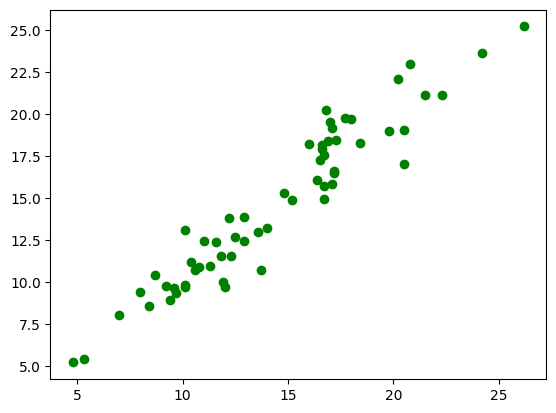

In [71]:
plt.scatter(ytest,prediction,c='g') #Anayzing Result